## Undersøkelse og forberedelse av data

I denne notebooken har vi skrevet eksempelkode for hvordan man skal klargjøre data til modellering. Det er nødvendig å gjøre egne mappinger, samt ta avgjørelser for hva som skal være kategoriske variabler for å få et ferdig datasett som kan brukes videre i maskinlæringsdelen av workshopen. Du er derfor nødt til å gjøre en grundig jobb her for å komme videre til neste notebook. 

Før vi kan begynne med modelleringen er vi nødt til å undersøke dataene grundig. Vi må få en oversikt over:
* Størrelsen
* Fordelingen på fasiten vår
* Mangler vi data?
* Finner vi noe rart?
* Hva er kategorisk og hva er numerisk?
* Hva må mappes og hva må ordnes?
* Ser vi noen sammenhenger som utgjør nye variabler?
* Enkoding

Én verktøykasse i python som vi kan bruke til alle disse tingene heter "Pandas". I pandas får man en praktisk klasse for å representere data som en tabell, som heter en "DataFrame". Hvis man trenger å gjøre noe som helst med dataen sin, er det med stor sansynlighet en god måte å gjøre det på i Pandas! Så da er det bare å google hva enn du vill gjøre (f.eks. "pandas average of column", eller "pandas unique values in column") for å få masse forklaringer og eksempelkode.

Pandas kan lese inn data fra formater som CSV og Parquet rett til en DataFrame! Den har kolonner med forskjellige variabler, og hver rad i tabellen er data som hører sammen. I vårt tilfelle er hver rad én forsikringsskadesak, og hver kolonne er én variabel om personen, forsikringsobjektet eller omstendighetene for skaden.

Alt ettersom hva du jobber med og hva slags krav som stilles er det flere ting en det som finnes i denne Notebooken som kan gjøres for å utforske og analysere dataen ytterligere. Vi fokuserer på noen få ting for å prøve å holde det enkelt med vanskelig og interaktivt nok, og gi de som er flinke plass til å gjøre sine egne utforskninger for å få en fordel over de andre gruppene!

#### Vi starter med å lese inn datasettet til en pandas dataframe

In [1]:
import pandas as pd
df = pd.read_csv('data/fraud.csv')

#### La oss ta en første kikk på dataene, for få oversikt over hva vi skal jobbe med

Det finnes metoder i pandas som gir det et kjapt overblikk!

`df.info()` gir deg en oversikt over størrelse, variabler og typer. Kolonner med typen "object" kan fort inneholde et strengnavn, mens f.eks. "int64" bare er heltall.

`df.describe()` gir deg deskriptiv statistikk over numeriske variablers distribusjon.

`df.sample(15).T` gir deg 15 tilfeldige rader fra dataframen din. `.T` flipper dataframen og viser oss de tilfeldige radene våre "sidelengs", altså med kolonnene som rader, og radene som kolonner. Nyttig triks for visning i notebook når du har mange kolonner!

In [6]:
df.sample(15).T

,4011,10026,6736,489,6750,3833,1787,6727,4463,276,9400,2321,7515,3916,4737
ID,4262,7293,6722,2227,9081,7316,893,4289,11315,9702,138,598,12633,5518,12975
Month,Nov,Dec,Sep,Feb,Dec,Oct,Nov,Jul,Mar,Mar,Dec,Aug,Oct,Aug,Dec
WeekOfMonth,4,4,4,4,4,3,2,5,1,3,4,4,4,1,1
DayOfWeek,Friday,Thursday,Tuesday,Saturday,Thursday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Friday,Friday,Friday,Tuesday
Make,Toyota,Toyota,Honda,Pontiac,Pontiac,Pontiac,Mazda,Honda,Pontiac,Pontiac,Mercury,Toyota,Dodge,Toyota,Chevrolet
AccidentArea,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Rural,Urban,Urban,Urban,Urban,Urban,Urban,Urban
DayOfWeekClaimed,Friday,Tuesday,Wednesday,Tuesday,Tuesday,Wednesday,Friday,Tuesday,Friday,Wednesday,Thursday,Friday,Monday,Thursday,Thursday
MonthClaimed,Nov,Dec,Sep,Feb,Jan,Oct,Nov,Aug,Mar,Mar,Jan,Sep,Oct,Sep,Dec
WeekOfMonthClaimed,4,4,5,5,1,4,3,1,1,4,1,1,5,1,2
Sex,Male,Female,Female,Male,Male,Male,Female,Male,Female,Male,Male,Male,Male,Male,Female


Det finnes en metode for å finne ut hvor mange ganger hver unike verdi forekommer i en kolonne!

Her kan vi se at det er et stort overtall av menn i kategorien kjønn, altså "Sex" 

In [6]:
df["Sex"].value_counts()

Male      9767
Female    1798
Name: Sex, dtype: int64

#### Prosentvis fordeling av fasit

"fasit" for maskinlæringsmodellen vår er jo "avdekket svindel"/"ikke avdekket svindel". Men hvor mange avdekkede svindelsaker er det?

In [5]:
total_fraud=(df.FraudFound_P.value_counts()[1]+df.FraudFound_P.value_counts()[0])
not_fraud=df.FraudFound_P.value_counts()[0]
fraud=df.FraudFound_P.value_counts()[1]
prct_not_fraud=not_fraud/total_fraud*100
prct_fraud=fraud/total_fraud*100
print(f'Datasettet består av {df.shape[1]} forklaringsvariabler og {len(df)} observasjoner.')
print(f"{round(prct_not_fraud)}% av observasjonene er ikke markert som svindel")
print(f"{round(prct_fraud)}% av observasjonene er markert som svindel")

Datasettet består av 34 forklaringsvariabler og 11565 observasjoner.
94% av observasjonene er ikke markert som svindel
6% av observasjonene er markert som svindel


Dette betyr at vi har en stor ubalanse i fasiten vår som forteller oss om kunden har begått svindel eller ikke

#### Lister unike verdier for hver forklaringsvariabel

Det kan hjelpe oss med å finne feil eller se andre sammenhenger hvor vi kan forbedre datagrunnlaget vårt.

In [13]:
from pprint import pprint
for col in df:
    print(f"{col}: \n\t{df[col].unique()}\n")       

ID: 
	[ 1068  2945  6883 ... 11245  8374  2226]

Month: 
	['Nov' 'Jun' 'Jan' 'Oct' 'Sep' 'Feb' 'Dec' 'Jul' 'Apr' 'May' 'Aug' 'Mar']

WeekOfMonth: 
	[5 3 4 2 1]

DayOfWeek: 
	['Monday' 'Thursday' 'Friday' 'Saturday' 'Wednesday' 'Tuesday' 'Sunday']

Make: 
	['Accura' 'Chevrolet' 'Mazda' 'Toyota' 'Honda' 'Pontiac' 'VW' 'Dodge'
 'Mercury' 'Saab' 'Ford' 'Saturn' 'Nisson' 'BMW' 'Porche' 'Ferrari'
 'Jaguar' 'Mecedes' 'Lexus']

AccidentArea: 
	['Urban' 'Rural']

DayOfWeekClaimed: 
	['Thursday' 'Friday' 'Monday' 'Tuesday' 'Wednesday' 'Saturday' 'Sunday'
 '0']

MonthClaimed: 
	['Dec' 'Jul' 'Feb' 'Nov' 'Oct' 'Sep' 'Jan' 'Apr' 'Mar' 'May' 'Aug' 'Jun'
 '0']

WeekOfMonthClaimed: 
	[1 5 3 2 4]

Sex: 
	['Male' 'Female']

MaritalStatus: 
	['Married' 'Single' 'Divorced' 'Widow']

Age: 
	[36 33 46 27 45 59 28 48 55 72 29 49 58 61 53 32 40 39 51  0 52 60 43 35
 54 34 64 37 31 26 77 47 30 50 63 42 57 56 22 38 23 65 44 73 70 21 25 62
 76 24 80 18 71 79 41 68 75 67 66 19 17 78 69 20 74 16]

Fault: 
	['Policy

#### Vi deler forklaringsvariablene inn i kategoriske og numeriske variabler
Ved hjelp av oversikten over kan vi avgjøre hvilke forklaringsvariabler som skal være kategoriske og hvilke som skal være numeriske. Om vi bestemmer at en forklaringsvariabel skal være kategorisk, kan det allikevel være nyttig å ordne eller sortere verdiene. Det kan hjelpe tremodellen vår til å gjøre bedre og mer effektive valg. Det kan også være nyttig å lage en ny variabel basert på en vi allerede har. For eksempel fra måned til sesong.

#### Tre eksempler på mapping av data
I de tre neste blokkene, viser vi tre eksempler på hvordan man kan mappe data. Dere må selv mappe alle andre kontinuerlige variabler fra typen string til type int eller float for at de skal kunne gjøre nytten sin i en logistisk regressjonsmodell. I tillegg anbefaler vi å ordne alle kategoriske variabler som har en meningsfull rekkefølge.    



##### Vi legger til en ny forkalringsvariabel "Season" ved å mappe Month til Season

In [7]:
season_mapping = {
    "Jan":"Winter",
    "Feb":"Winter",
    "Mar":"Spring",
    "Apr":"Spring",
    "May":"Spring",
    "Jun":"Summer",
    "Jul":"Summer",
    "Aug":"Summer",
    "Sep":"Fall",
    "Oct":"Fall",
    "Nov":"Winter",
    "Dec":"Winter"
}
df["Season"] = df["Month"].map(season_mapping)
print(df["Season"].unique())

['Winter' 'Summer' 'Fall' 'Spring']


##### Mapping av den kategoriske variabelen Month fra string til en ordnet tallrekke av typen int

In [8]:
month_mapping = {
    "Jan":1,
    "Feb":2,
    "Mar":3,
    "Apr":4,
    "May":5,
    "Jun":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12
}
df=df.replace({"Month": month_mapping})
print(df["Month"].unique())

[11  6  1 10  9  2 12  7  4  5  8  3]


##### Vi mapper den numeriske variabelen AddressChange_Claim til en ordnet tallrekke


In [9]:
ageofvehicle_mapping = {
    "new": 1,
    "2 years": 2,
    "3 years": 3,
    "4 years": 4,
    "5 years": 5,
    "6 years": 6,
    "7 years": 7,
    "more than 7": 8
}
df=df.replace({"AgeOfVehicle": ageofvehicle_mapping})
print(df["AgeOfVehicle"].unique())

[7 6 5 8 1 4 3 2]


#### One Hot / Dummies

Hvis du vil encode en kategorisk variabel som OneHot/Dummy finnes det en kjekk funksjon for det i pandas!

`df = pd.get_dummies(df, columns=['kategorisk_kolonne1', 'kategorisk_kolonne2'])`

Denne koden vil erstatte 'kategorisk_kolonne1' og 'kategorisk_kolonne2' i 'df' med like mange binære kolonner per variabel som det er unike verdier.

Hvis du lurer på hva en "One Hot" eller "Dummy"-variabel er eller om det er riktig for dere, er det vare å google i vei!

#### Konvertering av numeriske variabler som er object/strenger

Hvis du mener at en kolonne inneholder verdier som lett kan konverteres til tall direkte fordi de er strenger som "1", "2.5", osv, kan du bruke en direkte konverteringsmetode.

```
object_columns = df["object_col1", "object_col2"]
converted_columns = object_columns.apply(pd.to_numeric, errors = 'coerce')
df["object_col1", "object_col2"] = converted_columns
```

Her applikeres pandas sin "to_numeric"-metode til hver enkelt kolonne i dataframen "object_columns", og "coerce" betyr at errors som oppstår når verdiene ikke kan konverteres til et tall blir tvunget til verdien "Not A Number". 

#### ⚠️ Lag nye kodeblokker nedenfor hvor du gjør de resterende mappingene

#### Vi sjekker om det er duplikater

In [ ]:
df.duplicated().any()

#### Vi sjekker om det er "NA"-verdier i datasettet

NA er en paraplybetegnelse for spesielle typer som er ment å symbolisere en manglende verdi, eller en feilverdi. Noen eksempler på dette er "None", "Null" og "Not a Number"(i en numerisk variabel).

In [ ]:
df.isna().any()

#### Er det noen 0-verdier der det ikke bør være det?

In [ ]:
for col in df:
    if df[col].dtype == int:
        count = (df[col] == 0).sum()
    else:
        count = (df[col] == '0').sum()
    if count > 0:
        print(f'{col} {count}')

Ja, vi fant ut at Age-variabelen har hele 232 0-verdier, her er det noe som ikke stemmer.
Vi må finne ut hva vi skal mappe denne til. Vi kan enten finne en annen verdi/mean-verdi basert på informasjon fra de andre variablene. Eller vi kan beholde den som 0. I en linær modell er nok en mean verdi viktigere å sette inn enn i en tremodell.

In [ ]:
df["Age"].loc[df["Age"] == 0] = 16

In [ ]:
print(df["Age"].unique())

Her følger eksempelkode for å plotte distribusjonen av verdiene i en kontinuerlig inputvariabel.

`seaborn` er et plottegrafikkbibliotek, og `scipy` er et vitenskapelig statistikkbibliotek.

Det kan ofte lønne seg å plotte distribusjonene av variablerne dine for å se etter feil og spennende mønstre!

/var/folders/8w/nx3yt_x53p18ydt5xzlv3pyj3kqmgv/T/ipykernel_14737/87740386.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["Age"], fit=stats.norm)


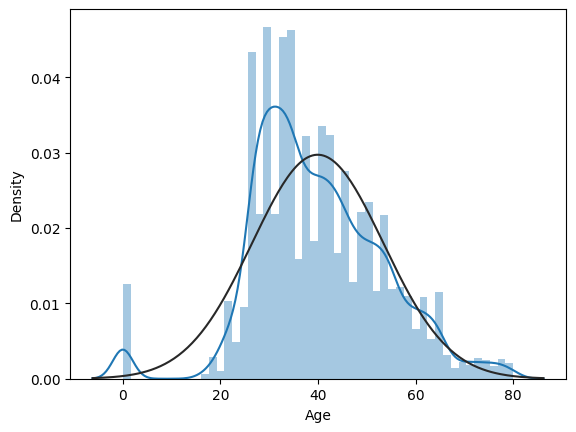

In [19]:
import seaborn as sns
import scipy.stats as stats

skew = df["Age"].skew()  # Denne tegner en linje som viser hvor forskøvet fra normalfordelingen dataene våre er
ax = sns.distplot(df["Age"], fit=stats.norm)

#### ⚠️ Skriv inn kategoriske forklaringsvariabler som skal enkodes til heltall mellom 0 og n (antall unike verdier i kolonne)

Det er lagt inn et par eksempler, men ta deres egen vurdering.

Denne metoden vil omgjøre alle variabler til et tall mellom 0 og n, hvor n er altall unike verdier i kolonnen! For uordnede kategoriske inputvariabler til logistisk regresjon er ikke dette en serlig god løsning, men den kan være god når man gjør kategorienkoding for trebaserte algoritmer! 

In [ ]:
categorical_features=['Month', 'Sex']

#### Encoding vil bare fungere dersom du har mappet alle de numeriske forklaringsvariablene riktig. 

In [ ]:
from sklearn.preprocessing import LabelEncoder

df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)

#### ⚠️ Det kan være du vil droppe noen av kolonnene fra dataen, før du sender dem til maskinlæringsmodellene dine.

For eksempel om du ikke 

`df = df.drop(axis=1, labels=[’kolonnenavn’])`

dropper alle kolonnenavn i "labels"-lista fra DataFramen


### Skriv resultatene til en fil

Denne filen skal brukes i den andre notebooken, og leveres på scoreboardet til oppgave 1 (mer info om det i den andre notebooken!)

In [20]:
df.to_parquet('data/fraud_processed.pq')